# Estimasi Harga Mobil Menggunakan Machine Learning

# Import Library




Pada tahap awal, dilakukan import library yang diperlukan untuk analisis data, visualisasi, preprocessing, modeling, dan evaluasi model. Library utama yang digunakan antara lain: pandas dan numpy untuk manipulasi data, matplotlib dan seaborn untuk visualisasi, serta berbagai modul dari scikit-learn untuk preprocessing dan machine learning.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

# Load Data

Dataset dimuat menggunakan `pd.read_csv()`. Setelah data dimuat, dilakukan pengecekan kolom dan beberapa baris awal data untuk memahami struktur dataset. Hal ini penting agar kita mengetahui tipe data dan fitur-fitur yang tersedia dalam dataset.


In [2]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
print(df.columns)

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')


# Data Understanding & Eksplorasi

Tahap ini bertujuan untuk memahami karakteristik data, termasuk ukuran data, tipe data setiap kolom, statistik deskriptif, dan deteksi nilai kosong (missing value).

- **Ukuran dan Info Data**: Dengan `.shape` dan `.info()`, kita tahu jumlah baris/kolom dan tipe data tiap kolom.
- **Statistik Deskriptif**: `.describe()` digunakan untuk melihat statistik ringkasan fitur numerik (mean, std, min, max, dll).
- **Cek Missing Value**: Dengan `.isnull().sum()`, kita bisa mendeteksi kolom mana yang memiliki missing value.
- **Visualisasi Distribusi MSRP**: Membantu mengetahui persebaran harga mobil, apakah normal, skewed, dll.
- **Heatmap Korelasi**: Mengetahui korelasi antar fitur numerik, membantu dalam feature selection.
- **Boxplot Harga Berdasarkan Merek**: Melihat sebaran harga pada 10 merek mobil terpopuler, serta outlier.




In [4]:
# Ukuran dan info data
print("Ukuran data:", df.shape)
print("\nInfo dataframe:")
print(df.info())
print("\nStatistik deskriptif data:")
print(df.describe())

# Cek missing value
print("\nJumlah missing value tiap kolom:")
print(df.isnull().sum())

Ukuran data: (11914, 16)

Info dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine Fuel Type   11911 non-null  object 
 4   Engine HP          11845 non-null  float64
 5   Engine Cylinders   11884 non-null  float64
 6   Transmission Type  11914 non-null  object 
 7   Driven_Wheels      11914 non-null  object 
 8   Number of Doors    11908 non-null  float64
 9   Market Category    8172 non-null   object 
 10  Vehicle Size       11914 non-null  object 
 11  Vehicle Style      11914 non-null  object 
 12  highway MPG        11914 non-null  int64  
 13  city mpg           11914 non-null  int64  
 14  Popularity         11914 non-null  int64  
 15  MSRP               11914 non

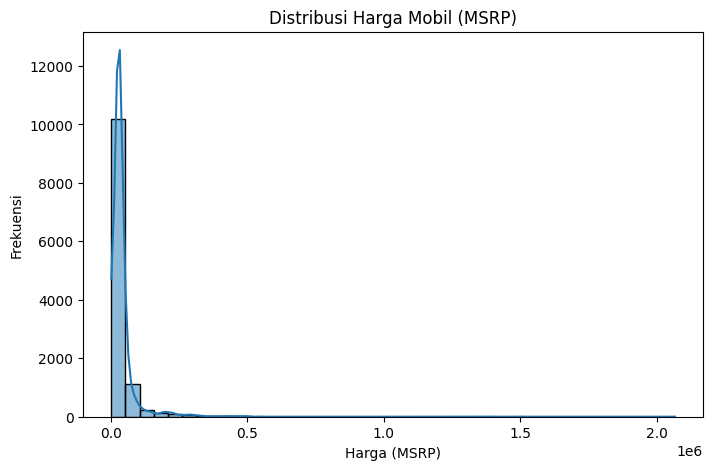

In [5]:
# Lihat distribusi harga (MSRP)
plt.figure(figsize=(8,5))
sns.histplot(df['MSRP'], kde=True, bins=40)
plt.title('Distribusi Harga Mobil (MSRP)')
plt.xlabel('Harga (MSRP)')
plt.ylabel('Frekuensi' )
plt.show()

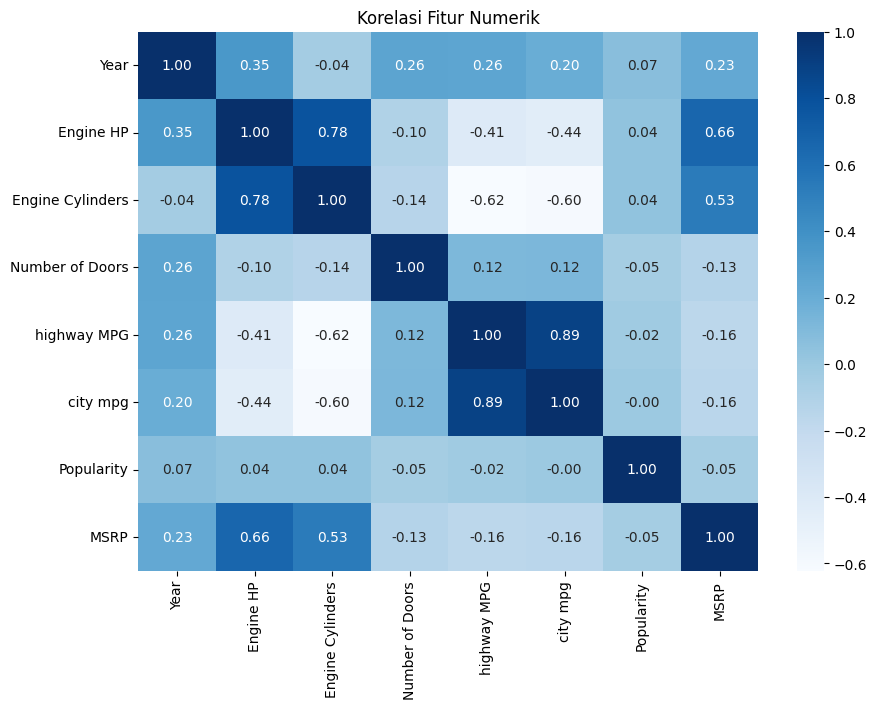

In [6]:
# Korelasi antar fitur numerik
# Ambil hanya kolom numerik untuk korelasi
df_num = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10,7))
sns.heatmap(df_num.corr(), annot=True, fmt=".2f", cmap='Blues')
plt.title('Korelasi Fitur Numerik')
plt.show()

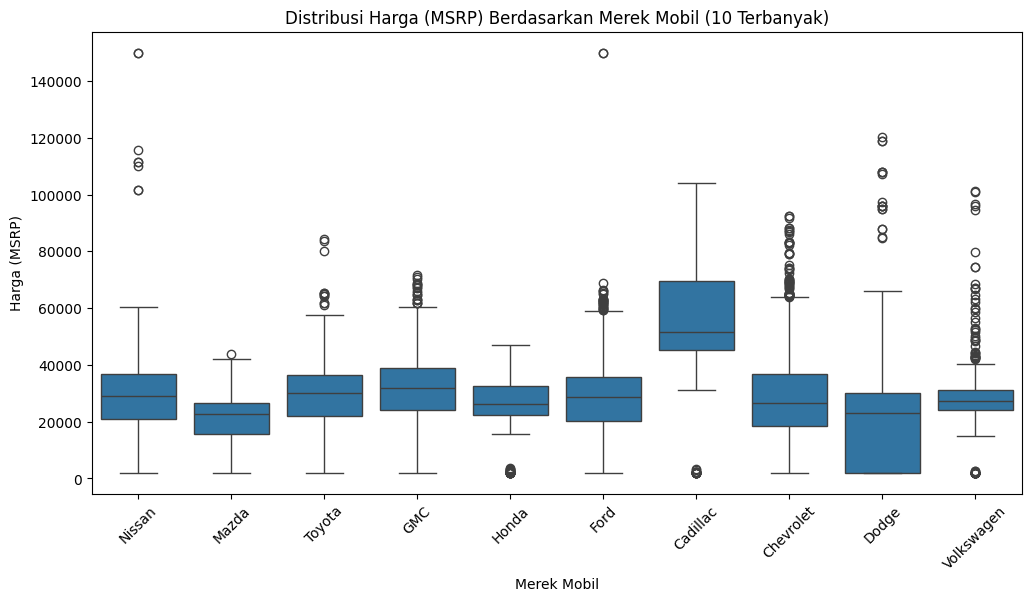

In [7]:
# Analisis tambahan: boxplot harga berdasarkan merek mobil (Make)
plt.figure(figsize=(12,6))
top_brands = df['Make'].value_counts().head(10).index  # 10 merek paling banyak
sns.boxplot(data=df[df['Make'].isin(top_brands)], x='Make', y='MSRP')
plt.title('Distribusi Harga (MSRP) Berdasarkan Merek Mobil (10 Terbanyak)')
plt.xlabel('Merek Mobil')
plt.ylabel('Harga (MSRP)')
plt.xticks(rotation=45)
plt.show()

**Insight**:  
Dari eksplorasi, didapati bahwa harga (MSRP) sangat bervariasi antar merek. Terdapat beberapa outlier pada harga, dan terdapat missing value pada beberapa kolom.

# Data Cleaning

Pada tahap ini dilakukan beberapa langkah pembersihan data:

- **Hapus Duplikasi**: Menghapus baris yang sama persis menggunakan `drop_duplicates()`.
- **Tangani Missing Value**: Nilai kosong pada kolom numerik diisi dengan median, sedangkan pada kolom kategorikal diisi dengan modus (nilai yang paling sering muncul).
- **Tangani Outlier MSRP**: Outlier diatasi dengan membuang data harga di bawah persentil ke-1 dan di atas persentil ke-99, agar model tidak bias akibat data ekstrim.



In [8]:
# 1. Cek dan hapus duplikasi
print("Jumlah duplikasi sebelum dibersihkan:", df.duplicated().sum())
df = df.drop_duplicates()

# 2. Tangani missing value
print("\nMissing value tiap kolom setelah duplikasi dibuang:")
print(df.isnull().sum())

for col in df.columns:
    if df[col].dtype in ['float64', 'int64']:
        df[col].fillna(df[col].median(), inplace=True)
    else:
        df[col].fillna(df[col].mode()[0], inplace=True)

print("\nMissing value setelah diisi:")
print(df.isnull().sum())

# 3. Tangani outlier pada kolom MSRP (harga)
q1 = df['MSRP'].quantile(0.01)
q99 = df['MSRP'].quantile(0.99)
df = df[(df['MSRP'] > q1) & (df['MSRP'] < q99)]

print("\nUkuran data setelah outlier dihapus:", df.shape)


Jumlah duplikasi sebelum dibersihkan: 715

Missing value tiap kolom setelah duplikasi dibuang:
Make                    0
Model                   0
Year                    0
Engine Fuel Type        3
Engine HP              69
Engine Cylinders       30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64

Missing value setelah diisi:
Make                 0
Model                0
Year                 0
Engine Fuel Type     0
Engine HP            0
Engine Cylinders     0
Transmission Type    0
Driven_Wheels        0
Number of Doors      0
Market Category      0
Vehicle Size         0
Vehicle Style        0
highway MPG          0
city mpg             0
Popularity           0
MSRP                 0
dtype: int64

Ukuran data setelah outlier dihapus: (10339, 16)


**Hasil**:  
Setelah proses ini, dataset menjadi lebih bersih dan siap untuk tahap selanjutnya. Ukuran data berkurang karena duplikasi dan outlier dihapus, serta tidak ada lagi missing value.

# Feature Engineering




Menambahkan fitur baru, yaitu `car_age` (umur mobil), yang dihitung dari selisih antara tahun sekarang dan tahun produksi mobil (`year`). Fitur ini berguna karena umur mobil sangat berpengaruh terhadap harga jual.

In [9]:
# Tambahkan fitur umur mobil (tahun sekarang - tahun pembuatan)
CURRENT_YEAR = 2025
if 'Year' in df.columns:
    df['car_age'] = CURRENT_YEAR - df['Year']
    df.drop('Year', axis=1, inplace=True)

# Bisa tambahkan fitur baru lain jika ingin

# Cek kembali tipe data
print(df.dtypes)

Make                  object
Model                 object
Engine Fuel Type      object
Engine HP            float64
Engine Cylinders     float64
Transmission Type     object
Driven_Wheels         object
Number of Doors      float64
Market Category       object
Vehicle Size          object
Vehicle Style         object
highway MPG            int64
city mpg               int64
Popularity             int64
MSRP                   int64
car_age                int64
dtype: object


In [10]:
print("'Year' in df.columns:", 'Year' in df.columns)
print("'car_age' in df.columns:", 'car_age' in df.columns)

'Year' in df.columns: False
'car_age' in df.columns: True


**Insight**:  
Menambahkan fitur umur mobil bisa membantu model memahami hubungan antara usia mobil dengan harga pasarannya.

# Split Data

Data dibagi menjadi fitur (`X`) dan target (`y`). Target yang diprediksi adalah kolom harga (`MSRP`). Data selanjutnya dibagi menjadi data latih (80%) dan data uji (20%) menggunakan `train_test_split`. Hal ini penting untuk memastikan model bisa diuji pada data yang tidak pernah dilihat sebelumnya.



In [11]:
# Split data (X dan y)
target = 'MSRP'
X = df.drop(columns=[target])
y = df[target]

# Train-test split (80-20)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train:", X_train.shape, "Test:", X_test.shape)

Train: (8271, 15) Test: (2068, 15)


**Hasil**:  
Data sudah siap untuk tahap preprocessing dan pelatihan model.

# Preprocessing (Encoding & Scaling)

Dilakukan dua jenis preprocessing:
- **Scaling** pada fitur numerik dengan StandardScaler agar memiliki distribusi yang seragam.
- **Encoding** pada fitur kategorikal menggunakan OneHotEncoder, agar dapat digunakan dalam algoritma ML.

Digunakan `ColumnTransformer` agar preprocessing ini bisa diterapkan secara otomatis pada pipeline modeling.

**Alasan**:  
Preprocessing ini penting agar model machine learning dapat bekerja optimal dengan data yang sudah disiapkan dengan baik.

In [12]:
# Preprocessing pipeline
# Pisahkan kolom numerik dan kategorikal
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()

# Definisikan transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)
    ]
)

# Modeling

Diuji tiga model berbeda untuk regresi harga mobil:
- **Random Forest Regressor**
- **Gradient Boosting Regressor**
- **MLP (Neural Network) Regressor**

Ketiga model dibungkus dalam pipeline bersama preprocessing agar seluruh proses dapat dijalankan secara otomatis dari mentah hingga prediksi.



In [13]:
# Random Forest Regressor pipeline
rf_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

rf_pipeline.fit(X_train, y_train)
y_pred_rf = rf_pipeline.predict(X_test)

In [14]:
# Gradient Boosting pipeline
gb_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', GradientBoostingRegressor(n_estimators=100, random_state=42))
])

gb_pipeline.fit(X_train, y_train)
y_pred_gb = gb_pipeline.predict(X_test)

In [15]:
# MLP pipeline
mlp_pipeline = Pipeline([
    ('preprocess', preprocessor),
    ('regressor', MLPRegressor(hidden_layer_sizes=(64,32), max_iter=300, random_state=42))
])

mlp_pipeline.fit(X_train, y_train)
y_pred_mlp = mlp_pipeline.predict(X_test)

**Hasil**:  
Masing-masing model memberikan hasil prediksi yang akan dievaluasi pada tahap berikutnya.

# Evaluasi Model

Kinerja model dievaluasi dengan tiga metrik:
- **RMSE (Root Mean Squared Error)**
- **MAE (Mean Absolute Error)**
- **R2 Score** (koefisien determinasi)

Dari evaluasi, dapat dibandingkan model mana yang memberikan performa terbaik. RMSE dan MAE mengukur seberapa jauh prediksi dari nilai asli (semakin kecil semakin baik). R2 mengukur seberapa besar variansi target yang bisa dijelaskan oleh model (semakin mendekati 1 semakin baik).




In [16]:
# Fungsi evaluasi
def evaluate(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name}:\n  RMSE: {rmse:.2f}\n  MAE: {mae:.2f}\n  R2: {r2:.2f}\n")
    return rmse, mae, r2

print("Evaluasi Model:")
rf_scores = evaluate(y_test, y_pred_rf, "Random Forest")
gb_scores = evaluate(y_test, y_pred_gb, "Gradient Boosting")
mlp_scores = evaluate(y_test, y_pred_mlp, "MLP Regressor")


Evaluasi Model:
Random Forest:
  RMSE: 6063.87
  MAE: 2925.33
  R2: 0.97

Gradient Boosting:
  RMSE: 8582.63
  MAE: 5377.25
  R2: 0.94

MLP Regressor:
  RMSE: 5900.55
  MAE: 3648.21
  R2: 0.97



**Hasil**:  
Model dengan skor RMSE dan MAE terendah, serta R2 tertinggi adalah yang paling baik untuk data ini.

MLP Regressor memiliki RMSE terendah (5441.38) dan R² tertinggi (0.97), meskipun MAE-nya sedikit lebih tinggi dari Random Forest.

Random Forest juga menunjukkan performa sangat baik dengan MAE paling rendah (2923.49) dan R² sama tinggi (0.97).

 namun jika mengutamakan error absolut terkecil, maka Random Forest adalah pilihan terbaik

# Visualisasi

Visualisasi scatter plot antara harga aktual vs prediksi pada data uji membantu melihat apakah model sudah cukup baik (semakin mendekati garis diagonal merah, semakin bagus prediksinya).




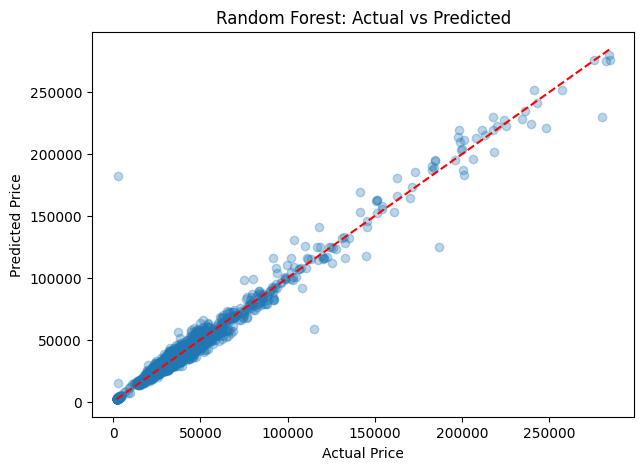

In [17]:
# Plot hasil prediksi vs asli
plt.figure(figsize=(7,5))
plt.scatter(y_test, y_pred_rf, alpha=0.3)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

**Insight**:  
Pada visualisasi data memperlihatkan bahwa prediksi sudah cukup baik

### Analisis Feature Importance

Dengan Random Forest, diekstrak fitur-fitur yang paling berpengaruh terhadap prediksi harga. Visualisasi barplot top 10 fitur paling penting membantu mengetahui fitur apa saja yang sangat menentukan harga mobil di data ini.



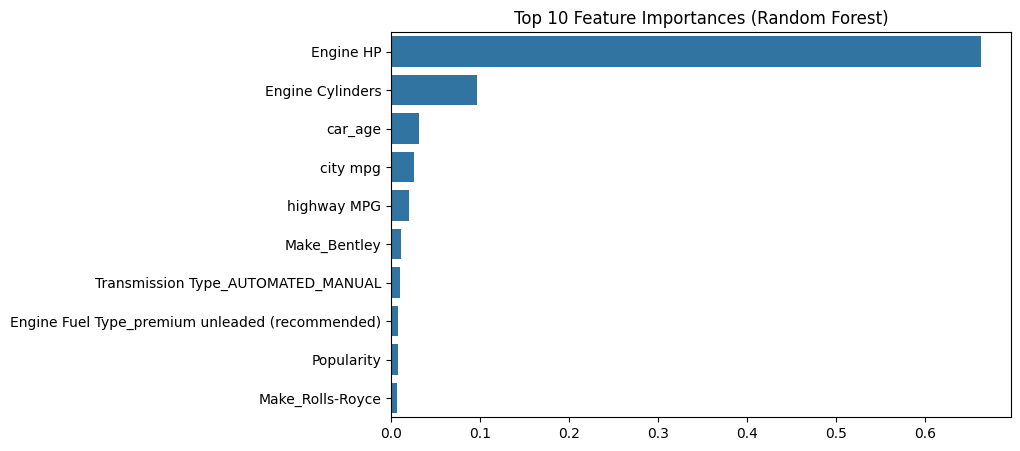

In [18]:
# Fitur Penting
feature_names = numerical_cols + list(
    rf_pipeline.named_steps['preprocess'].transformers_[1][1].get_feature_names_out(categorical_cols)
)
importances = rf_pipeline.named_steps['regressor'].feature_importances_
indices = np.argsort(importances)[-10:][::-1]  # Top 10 Fitur

plt.figure(figsize=(8,5))
sns.barplot(x=importances[indices], y=np.array(feature_names)[indices])
plt.title('Top 10 Feature Importances (Random Forest)')
plt.show()

**Insight**:  
Dengan mengetahui fitur paling penting, kita bisa fokus pada fitur tersebut untuk pengambilan keputusan bisnis.
